In [1]:
import numpy as np
import pylab as plt
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
import random
from scipy.integrate import ode
%matplotlib inline

In [2]:
def Lor(t,x):
    return([10*(x[1]-x[0]),x[0]*(28-x[2])-x[1],x[0]*x[1]-8/3*x[2]])

In [3]:
t0=0
dt=0.01
Nt=10000
t1=Nt*dt-dt
t=np.linspace(t0,t1,Nt)

y0=np.array([0.1,0.1,0.1])
solver=ode(Lor)
solver.set_integrator('dopri5')
solver.set_initial_value(y0,t0)

sol = np.empty([Nt, 3])
sol[0,:]=y0

k = 1
while solver.successful() and solver.t < t1:
    solver.integrate(t[k]) 
    sol[k,:]=np.asarray(solver.y)   
    k += 1  

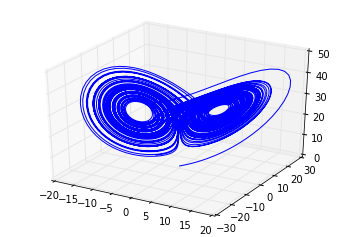

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(sol[:,0],sol[:,1],sol[:,2])
plt.savefig('Lorentzattraktor')

**a**

In [5]:
x=sol[:,0]
noise = np.random.normal(0,0.2,Nt)
s=x+noise

xb=x-np.mean(x)
sb=s-np.mean(s)

In [6]:
d=20
Xx=np.zeros((Nt-d,d))
Xs=np.zeros((Nt-d,d))

for i in range(d):
    Xx[:,i]=x[i:Nt-d+i]
    Xs[:,i]=s[i:Nt-d+i]

In [7]:
Ux, sx, Vx =np.linalg.svd(Xx)
Us, ss, Vs =np.linalg.svd(Xs)

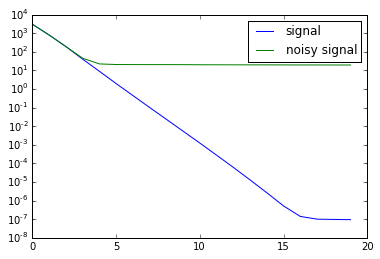

In [9]:
plt.semilogy(sx,label='signal')
plt.semilogy(ss,label='noisy signal')
plt.legend()
plt.savefig('singular-values')

**b**

**Svd**

In [10]:
xu=Us[:,0]
yu=Us[:,1]
zu=Us[:,2]

2d

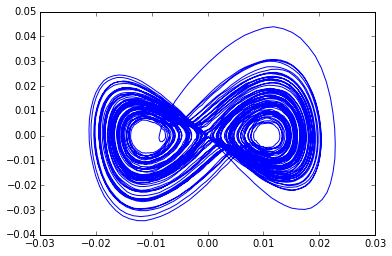

In [11]:
plt.plot(xu,yu)
plt.savefig('2d-svd-reconstruction')

3d

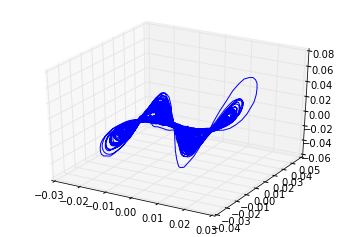

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(xu,yu,zu)
plt.savefig('3d-svd-reconstruction')

**delay coordinates**

In [13]:
T_d=10
S_d=np.zeros((Nt-2*T_d,3))
S_d[:,0]=s[:Nt-2*T_d]
t=np.roll(s,-T_d)
S_d[:,1]=t[:Nt-2*T_d]
t=np.roll(s,-2*T_d)
S_d[:,2]=t[:Nt-2*T_d]

2d

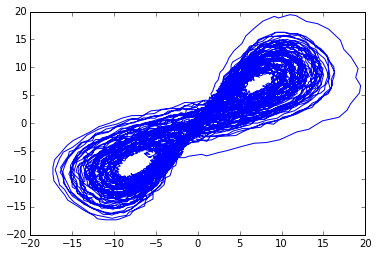

In [14]:
plt.plot(S_d[:,0],S_d[:,1])
plt.savefig('2d-delay-coordinates')

3d

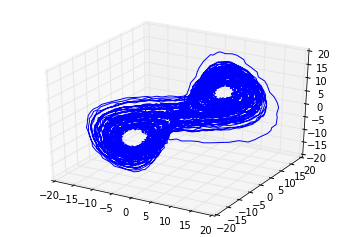

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(S_d[:,0],S_d[:,1],S_d[:,2])
plt.savefig('3d-delay-coordinates')

**PCA**

In [18]:
temp=np.linspace(1,20,20)

In [19]:
print temp

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.]
